# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
import datetime
import seaborn as sns
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Perform API calls and collect data
call_counter = 0
set_counter = 0

# Create Dictionary for Entry
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    
    if call_counter < 50:
        call_counter += 1
        
    else:
        set_counter += 1
        call_counter = 0

    print('Processing record {} of set {} | {}'.format(call_counter, set_counter, city))
    print(url)
    
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
        
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 2 of set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 3 of set 0 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 4 of set 0 | kashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 5 of set 0 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 6 of set 0 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 7 of set 0 | show low
http://api.openweathermap.org/data/2.5/weath

Processing record 7 of set 1 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 8 of set 1 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 9 of set 1 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 10 of set 1 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 11 of set 1 | yucca valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 12 of set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 13 of set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing 

Processing record 13 of set 2 | tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 14 of set 2 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 15 of set 2 | riachao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 16 of set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 17 of set 2 | benghazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 18 of set 2 | tommot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 19 of set 2 | tymovskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing re

Processing record 20 of set 3 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 21 of set 3 | lashio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 22 of set 3 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 23 of set 3 | bowen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 24 of set 3 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 25 of set 3 | puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 26 of set 3 | otradnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processin

Processing record 26 of set 4 | mangrol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 27 of set 4 | kemijarvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
City not found. Skipping...
Processing record 28 of set 4 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 29 of set 4 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 30 of set 4 | taldan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 31 of set 4 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 32 of set 4 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing record 33 of set 5 | golspie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 34 of set 5 | agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 35 of set 5 | kaduqli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 36 of set 5 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 37 of set 5 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 38 of set 5 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 39 of set 5 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing 

Processing record 39 of set 6 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 40 of set 6 | porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 41 of set 6 | tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 42 of set 6 | doembang nangbuat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 43 of set 6 | deh rawud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
City not found. Skipping...
Processing record 44 of set 6 | coruripe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 45 of set 6 | sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=21

Processing record 45 of set 7 | sarai alamgir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 46 of set 7 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 47 of set 7 | zharkent
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 48 of set 7 | shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 49 of set 7 | kibre mengist
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 50 of set 7 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 0 of set 8 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Proces

Processing record 1 of set 9 | tibati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 2 of set 9 | mantua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 3 of set 9 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 4 of set 9 | bastrop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 5 of set 9 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 6 of set 9 | clarksburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 7 of set 9 | fort wellington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing r

Processing record 9 of set 10 | iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 10 of set 10 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 11 of set 10 | mutare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 12 of set 10 | port moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 13 of set 10 | sauk rapids
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 14 of set 10 | kabarnet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 15 of set 10 | volga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
P

Processing record 16 of set 11 | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 17 of set 11 | daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 18 of set 11 | kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 19 of set 11 | coreau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 20 of set 11 | artyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
City not found. Skipping...
Processing record 21 of set 11 | bani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0892802001526c95e99dc9c
Processing record 22 of set 11 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=214de314d0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame, Define Actual Dictionary
weather_dictionary = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}

weather_df = pd.DataFrame(weather_dictionary)
weather_df.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Temp          581
Lat           581
Lng           581
Wind Speed    581
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,bredasdorp,79,ZA,1579818805,77,68.00,-34.53,20.04,11.41
1,ushuaia,75,AR,1579818795,71,50.00,-54.80,-68.30,24.16
2,avarua,90,CK,1579818646,88,82.40,-21.21,-159.78,10.29
3,kashi,75,CN,1579818806,58,24.80,39.45,75.98,2.24
4,tazovskiy,100,RU,1579818494,94,3.92,67.47,78.70,14.41


In [7]:
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)

# Set variable for output file
output_file = os.path.join('..', 'output_data', 'cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

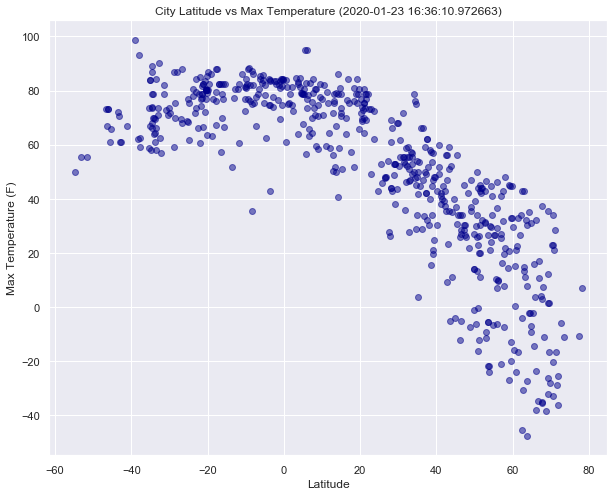

In [8]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(weather_df["Lat"], weather_df["Temp"], color='DarkBlue', alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({datetime.today()})")
plt.savefig("LatVTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

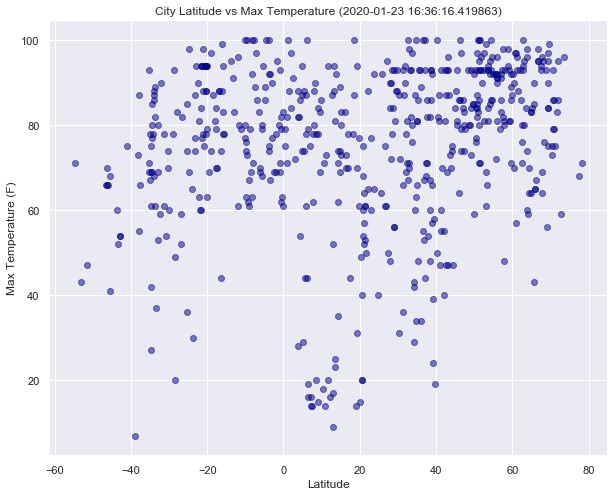

In [9]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color='DarkBlue', alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({datetime.today()})")
plt.savefig("LatVHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

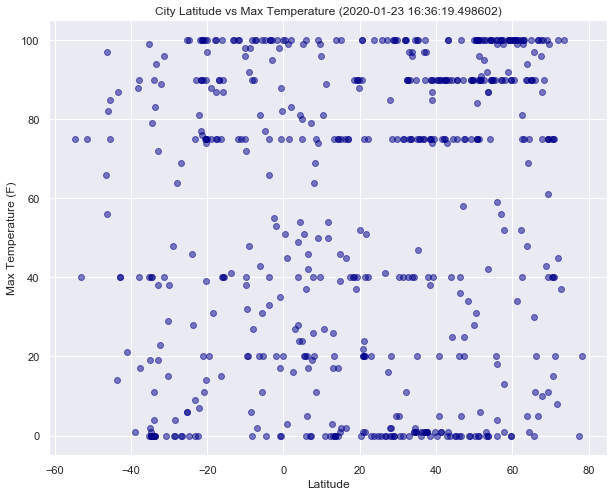

In [10]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='DarkBlue', alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({datetime.today()})")
plt.savefig("LatVCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

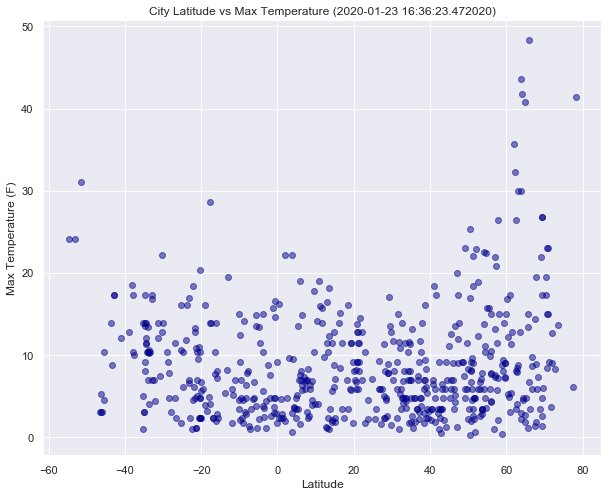

In [11]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color='DarkBlue', alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({datetime.today()})")
plt.savefig("LatVWind.png")
plt.show()